In [1]:
# !pip install --upgrade tensorflow
import tensorflow as tf

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
import sys
sys.path.insert(1,'/wsu/home/gy/gy40/gy4065/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/g/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.source')

In [3]:
# loading libraries
print('Loading/Installing Package => Begin\n\n')
import jet_ml_dataset_builder.jet_ml_dataset_builder_utilities as util
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import set_directory_paths
import tensorflow as tf
tf.random.set_seed(1234)
print('\nLoading/Installing Package => End\n\n')

Loading/Installing Package => Begin



Loading/Installing Package => End




In [4]:
print('\n########################################################################')
print('Checking the running platforms\n')
# Call the function and retrieve the dataset_directory_path and simulation_directory_path
# Access the dataset_directory_path and simulation_directory_path
dataset_directory_path, simulation_directory_path = set_directory_paths()
print('########################################################################\n')


########################################################################
Checking the running platforms

Python version: 3.11.5
OS: Windows
OS version: 10
running on Colab: False
Dataset Directory Path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\
Simulation Results Path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
########################################################################



In [5]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_label_items
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_labels_str
label_items_dict = get_label_items()
label_str_dict=get_labels_str(label_items_dict)

Aggregatring all parameters values
label_items:
 {'y_class_label_items': ['MMAT', 'MLBT'], 'alpha_s_items': [0.2, 0.3, 0.4], 'q0_items': [1.5, 2.0, 2.5]}
Building required params for the loading the dataset file
labels_str:
 {'class_labels_str': 'MMAT_MLBT', 'alpha_s_items_str': '0.2_0.3_0.4', 'q0_items_str': '1.5_2.0_2.5'}


In [6]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_dataset
dataset_size=1000
dataset_x, dataset_y=get_dataset(dataset_size,label_str_dict, dataset_directory_path,working_column=1)

Loading the whole dataset
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)
dataset.y(working_column) sample ['0.4' '0.4' '0.2' '0.4' '0.4' '0.3' '0.4' '0.3' '0.4' '0.4']


In [7]:
from jet_ml_models.pointnet import build_pointnet_classifier_model
from jet_ml_models.pointnet import compile_pointnet_classifier_model_with_hyperparam
NUM_POINTS = 1024
#because alpha_s can get 3 values
NUM_CLASSES = 3
activation="softmax"
# activation="sigmoid"

pointnet=build_pointnet_classifier_model(NUM_POINTS=NUM_POINTS,NUM_CLASSES=NUM_CLASSES, activation=activation)


In [8]:
learning_rate=0.001
loss='sparse_categorical_crossentropy'
# loss='categorical_crossentropy',

metrics='sparse_categorical_accuracy'
# metrics=['accuracy'],

# pointnet=compile_pointnet_classifier_model_with_hyperparam(pointnet,learning_rate)
pointnet=compile_pointnet_classifier_model_with_hyperparam(pointnet,learning_rate=learning_rate, loss=loss,metrics=metrics)

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1024, 3)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1024, 32)  │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024, 32)  │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1024, 32)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 1024, 64)  │      2,112 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024, 64)  │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 1024, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1024, 512) │     33,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024, 512) │      2,048 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 1024, 512) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_2[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │      1,161 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 3, 3)      │          0 │ dense_2[0][0]   

 Total params: 748,076 (2.85 MB)

 Trainable params: 741,996 (2.83 MB)

 Non-trainable params: 6,080 (23.75 KB)

Optimizer:  <keras.src.optimizers.adam.Adam object at 0x000002989FB34A50>
Loss function:  sparse_categorical_crossentropy
Metrics:  ['loss', 'compile_metrics']


In [9]:
from jet_ml_models.pointnet import preprocess_dataset
(x_train,  y_train,x_test,  y_test)=preprocess_dataset(dataset_x, dataset_y,is_one_hot_encoded=False)

Pre-processing
dataset_x_points shape: (1000, 1024, 3)
deleting the original dataset after splitting ...
train_points: <class 'numpy.ndarray'> 2457600 (800, 1024, 3)
train_y: <class 'numpy.ndarray'> 800 (800,)
x_test_points: <class 'numpy.ndarray'> 614400 (200, 1024, 3)
y_test: <class 'numpy.ndarray'> 200 (200,)
y_test[:10]:
 ['0.2' '0.3' '0.4' '0.4' '0.4' '0.3' '0.3' '0.4' '0.4' '0.2']
Preprocess y_train and y_test
Encoding to sparse categorical variable
y_test_encoded:
 [0 1 2 2 2 1 1 2 2 0]


In [10]:
from jet_ml_models.pointnet import create_tf_dataset
# Example usage:
# Create TensorFlow Dataset for training data
dataset = create_tf_dataset(x_train, y_train)

# Create TensorFlow Dataset for test data
test_dataset = create_tf_dataset(x_test, y_test)

In [11]:
from jet_ml_models.pointnet import prepare_datasets
from jet_ml_models.pointnet import augment
# Prepare datasets for training
train_dataset, validation_dataset,test_dataset  = prepare_datasets(dataset, test_dataset, len(x_train), len(x_test), augment)

In [12]:
monitor = 'val_accuracy'  # 'val_accuracy' or 'val_loss'
n_epochs = 20

print("simulation_directory_path:",simulation_directory_path)
simulation_path=f'{simulation_directory_path}jetml_pointnet_classification_alpha_s_{label_str_dict["alpha_s_items_str"]}'
print("simulation_path:",simulation_path)
current_simulation_name=f'_size_{1000}'
current_simulation_path=simulation_path+current_simulation_name

current_simulation_name=f'_epochs_{n_epochs}'
current_simulation_path=current_simulation_path+current_simulation_name

fold=1
current_simulation_name=f'_fold_{fold}'
current_simulation_path=current_simulation_path+current_simulation_name
print(current_simulation_path)

# Use ModelCheckpoint callback to save the best model
best_model_file_path = f'{current_simulation_path}_best_model.keras'
print("best_model_file_path:",best_model_file_path)

simulation_directory_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
simulation_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_20_fold_1
best_model_file_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_20_fold_1_best_model.keras


In [13]:
# pointnet.fit(train_dataset, epochs=20, validation_data=validation_dataset)

In [14]:
from jet_ml_models.pointnet import train_model_with_callbacks
# %%timeit -n1 -r1
monitor='val_sparse_categorical_accuracy'
model, history, train_time=train_model_with_callbacks(pointnet, train_dataset=train_dataset, validation_dataset=validation_dataset,monitor=monitor, best_model_file_path=best_model_file_path, n_epochs=n_epochs)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 52.9643 - sparse_categorical_accuracy: 0.2767
Epoch 1: val_sparse_categorical_accuracy improved from inf to 0.34375, saving model to D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_20_fold_1_best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 52.5234 - sparse_categorical_accuracy: 0.2780 - val_loss: 35.6925 - val_sparse_categorical_accuracy: 0.3438
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 35.6527 - sparse_categorical_accuracy: 0.3466
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.34375
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 35.6523 - sparse_categorical_accuracy: 0.3469 - val_loss: 35.4111 - val_sparse_categorical_accuracy: 0.3812
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 35.7332 - sparse_categorical_accuracy: 0.3263
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.3

In [15]:
print(train_time)
print(model)
print(history.history)

2.2409109393755595
<Functional name=pointnet, built=True>
{'loss': [43.70534133911133, 35.644264221191406, 35.722251892089844, 35.48603820800781, 35.46990966796875], 'sparse_categorical_accuracy': [0.3031249940395355, 0.3515625, 0.34375, 0.3421874940395355, 0.3125], 'val_loss': [35.69253158569336, 35.41109085083008, 35.39827346801758, 40.18679428100586, 36.27601623535156], 'val_sparse_categorical_accuracy': [0.34375, 0.3812499940395355, 0.3812499940395355, 0.29374998807907104, 0.3812499940395355]}


In [16]:
from jet_ml_models.pointnet import save_training_history
training_history_file_path_json,training_history_file_path_csv,training_history_file_path_csv = \
  save_training_history(history,current_simulation_path)

D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_20_fold_1_training_history.json
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_20_fold_1_training_history.csv
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_20_fold_1_training_history.npy


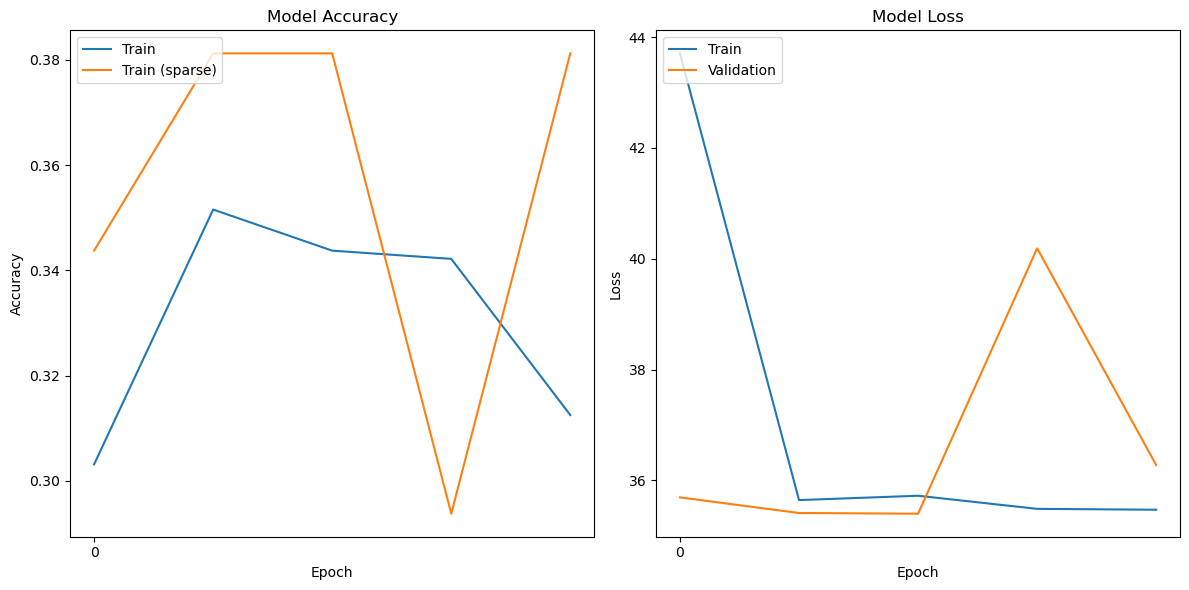

D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_20_fold_1_accuracy_loss.png


In [17]:
from jet_ml_models.pointnet import plot_training_history
plot_training_history_path=plot_training_history(history,current_simulation_path)
print(plot_training_history_path)

In [18]:
from jet_ml_models.pointnet import evaluate_model
accuracy, confusion_matrix = evaluate_model(model,test_dataset=test_dataset)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step
Accuracy: 0.365
Confusion Matrix: [[24  3 43]
 [18  5 42]
 [20  1 44]]


In [19]:
from jet_ml_models.pointnet import save_kfold_results
results_kfold = []
results_kfold.append({
                  'Dataset Size': dataset_size,
                  'Classifier': model.name,
                  'Fold Number': fold,
                  'Accuracy': accuracy,
                  'Confusion Matrix': confusion_matrix,
                  'Train Time': train_time,
                  'Loss/Accuracy Plot Path': plot_training_history_path,
                  'Best Model Path': best_model_file_path
              })
save_kfold_results(results_kfold, current_simulation_path)

   Dataset Size Classifier  Fold Number  Accuracy  \
0          1000   pointnet            1     0.365   

                          Confusion Matrix  Train Time  \
0  [[24, 3, 43], [18, 5, 42], [20, 1, 44]]    2.240911   

                             Loss/Accuracy Plot Path  \
0  D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...   

                                     Best Model Path  
0  D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...  


,Dataset Size,Classifier,Fold Number,Accuracy,Confusion Matrix,Train Time,Loss/Accuracy Plot Path,Best Model Path
0,1000,pointnet,1,0.365,"[[24, 3, 43], [18, 5, 42], [20, 1, 44]]",2.240911,D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...,D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...
